In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

In [3]:
mean_01=np.array([1,0.5])
cov_01=np.array([[1,0.1],[0.1,1.4]])

mean_02= np.array([5,5.5])
cov_02=np.array([[1.2,0.1],[0.1,1.3]])

In [4]:
dist_01=np.random.multivariate_normal(mean_01,cov_01,400)
dist_02=np.random.multivariate_normal(mean_02,cov_02,400)
print(dist_01.shape)

(400, 2)


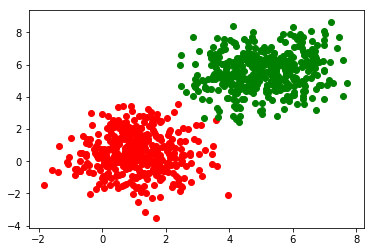

In [5]:
plt.scatter(dist_01[:,0],dist_01[:,1],color='red')
plt.scatter(dist_02[:,0],dist_02[:,1],color='green')
plt.show()

In [6]:
total=dist_01.shape[0]+dist_02.shape[0]
print(total)

800


In [7]:
data=np.zeros((total,dist_01.shape[1]+1))
print(data.shape)

(800, 3)


In [8]:
data[:400,:-1]=dist_01
data[400:,:-1]=dist_02
data[400:,-1]=1

In [9]:
print(data)

[[-0.5168243   0.29482118  0.        ]
 [ 1.36152096  1.59557369  0.        ]
 [ 3.02242     1.26155642  0.        ]
 ...
 [ 3.95411991  5.41568411  1.        ]
 [ 5.21808912  4.29406186  1.        ]
 [ 3.55236547  5.12626139  1.        ]]


In [10]:
np.random.shuffle(data)
print(data)

[[ 1.78619309 -0.21942374  0.        ]
 [ 4.95935592  5.97196329  1.        ]
 [ 0.50217886 -1.68693983  0.        ]
 ...
 [ 0.82402779  1.32272299  0.        ]
 [ 4.98890213  5.67708515  1.        ]
 [ 7.18557352  6.14639118  1.        ]]


In [11]:
##Normalize the data
u=np.mean(data[:,:-1],axis=0)
sigma=np.std(data[:,:-1],axis=0)
data[:,:-1]=(data[:,:-1]-u)/sigma

In [12]:
ones=np.ones((data.shape[0],1))

In [13]:
final_data=np.hstack((ones,data))

In [14]:
print(final_data)

[[ 1.         -0.55726443 -1.14407408  0.        ]
 [ 1.          0.85404476  1.05099206  1.        ]
 [ 1.         -1.12834798 -1.66436055  0.        ]
 ...
 [ 1.         -0.9852011  -0.59732841  0.        ]
 [ 1.          0.86718585  0.94644731  1.        ]
 [ 1.          1.84418662  1.11283293  1.        ]]


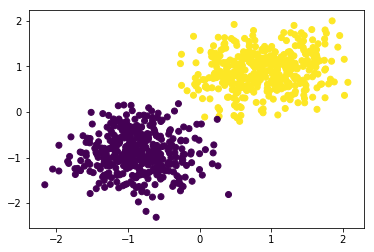

In [15]:
plt.scatter(final_data[:,1],final_data[:,2],c=final_data[:,3])
plt.show()

In [16]:
split=int(0.8*total)
print(split)

640


In [17]:
X_train=final_data[:split,:-1]
X_test=final_data[split,:-1]

Y_train=final_data[:split,-1]
Y_test=final_data[split:,-1]

In [18]:
print(np.sum(Y_train))

313.0


In [19]:
np.mean(X_train,axis=0)

array([ 1.        , -0.02264621, -0.01321182])

In [20]:
np.std(X_train,axis=0)

array([0.        , 1.00326684, 0.99263443])

In [21]:
def sigmoid(z):
    return(1/(1+np.exp(-z)))

In [22]:
def hypothesis(x,theta):
    return sigmoid(np.dot(x,theta))[0]

In [23]:
def error(Y,X,theta):
    m=X.shape[0]
    total_error=0.0
    for i in range(m):
        y_hat=hypothesis(X[i],theta)
        total_error+=(Y[i]*np.log2(y_hat)+(1-Y[i])*(np.log2(1-y_hat)))
    return total_error/m                   #total avg error

In [24]:
def get_grad(Y,X,theta):
    grad=np.zeros(theta.shape)
    m=theta.shape[0]
    for i in range(m):
        y_hat=hypothesis(X[i],theta)
        x=X[i].reshape((-1,1))
        grad+=-(y_hat-Y[i])*x
    return grad/m #avg gradient 

In [25]:
def grad_descent(X,Y,learning_rate):
    theta=np.zeros((X.shape[1],1))
    error_list=[]
    for i in range(5000):
        theta=theta+learning_rate*get_grad(Y,X,theta)
        e=error(Y,X,theta)
        error_list.append(e)
    return theta,error_list

In [26]:
theta,error_list=grad_descent(X_train,Y_train,0.01)

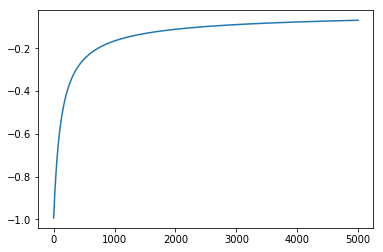

In [27]:
plt.plot(error_list)

In [28]:
print(theta)

[[-0.1874512 ]
 [ 1.74156784]
 [ 2.63821665]]


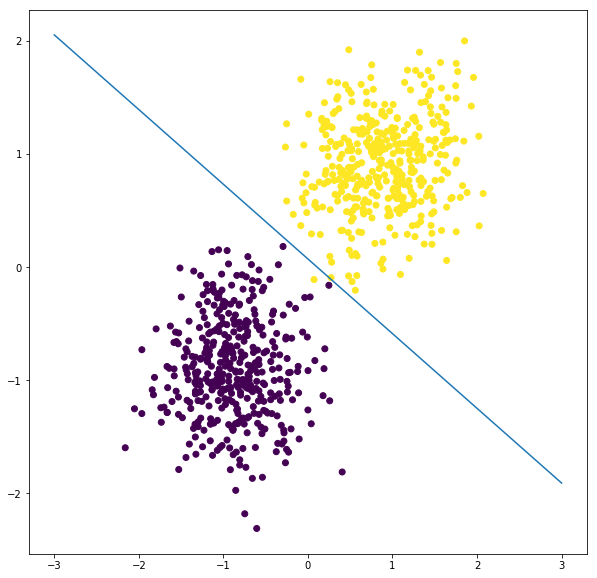

In [29]:
  plt.figure(figsize=(10,10))
def draw_line():
  
    x=np.linspace(-3,3,10)
    y=-(theta[0,0]*1+theta[1,0]*x)/theta[2,0]
    plt.plot(x,y)
    plt.show()
plt.scatter(final_data[:,1],final_data[:,2],c=final_data[:,3])

draw_line()

In [30]:
def pred(X_test,theta):
    prob=hypothesis(X_test,theta)
    if(prob<0.5):
        return 0
    else:
        return 1

In [31]:
Y_pred=np.array([pred(X_test[i],theta) for i in range(X_test.shape[0])])


In [32]:
Y_test=np.array(Y_test,dtype='int32')

In [33]:
print(X_test.shape)

(3,)
